# QuestionA

## 1 导入数据

In [69]:
# 导入第三方库
import pandas as pd
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [70]:
# 导入数据，这里使用的制造业全部清洗之后的数据
data = pd.read_csv("after_clean.csv", index_col=0)
data.head()

,CASH_C_EQUIV,NOTES_RECEIV,AR,PREPAYMENT,OTH_RECEIV,INVENTORIES,OTH_CA,T_CA,AVAIL_FOR_SALE_FA,LT_EQUITY_INVEST,...,COGS,N_INCOME,BIZ_TAX_SURCHG,NOPERATE_EXP,COMPR_INC_ATTR_M_S,INCOME_TAX,NOPERATE_INCOME,MINORITY_GAIN,T_COGS,FLAG
0,0.005507,0.003256,0.004397,0.000324,0.000110,0.000950,0.005371,0.003294,0.003495,0.000875,...,0.000396,0.137846,0.000481,0.010215,0.176785,0.313326,0.002322,0.149427,0.000445,0
1,0.008286,0.042705,0.003678,0.003355,0.002627,0.010642,0.000208,0.012058,0.003495,0.000576,...,0.004715,0.142562,0.002428,0.010349,0.176785,0.315662,0.003111,0.149427,0.005795,0
4,0.012310,0.000533,0.012123,0.001297,0.001151,0.006702,0.007535,0.009263,0.000023,0.002801,...,0.001062,0.142292,0.000976,0.010280,0.176260,0.314520,0.008353,0.148838,0.001618,0
6,0.008168,0.000007,0.003597,0.000855,0.002063,0.003447,0.015660,0.006531,0.003495,0.007207,...,0.002349,0.137826,0.001216,0.010452,0.174836,0.313186,0.002507,0.147383,0.002523,0
7,0.000471,0.000178,0.000757,0.001124,0.000024,0.000708,0.000009,0.000580,0.003495,0.007207,...,0.000402,0.136863,0.000489,0.010259,0.174894,0.312549,0.000671,0.147442,0.000386,0


In [15]:
# 统计造假和非造假公司的数量
data.FLAG.value_counts()

0    9863
1      80
Name: FLAG, dtype: int64

# 2 自定义模型

+ 使用了bagging的思想，进行投票，这里设置的只要投票率达到0.65就认为造假。

In [89]:
# 保存模型得分
score = []

# 保存模型特征重要性
imp = []

# 训练次数
num = 100

# 分别选出是否造假的数据
data_flag_0 = data[data['FLAG'] == 0]
data_flag_1 = data[data['FLAG'] == 1]

# 训练num轮
for i in range(num):
    
    # 从非造假数据中选取80条数据
    data_flag_0_choose = data_flag_0.sample(35)
    
    # 和造假数据合并为一个数据集
    data_re = pd.concat([data_flag_0_choose,data_flag_1])

    X = data_re.loc[:, :'T_COGS']
    y = data_re['FLAG']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

    # 随机欠采样
    # rus = RandomUnderSampler(random_state=0)
    # X_rus, y_rus = rus.fit_resample(X_train, y_train)

    # 随机过采样
    ros = RandomOverSampler(random_state=0,sampling_strategy='auto')  
    X_train, y_train = ros.fit_resample(X_train, y_train)

    # 训练模型
    # RandomForest model
    model = RandomForestClassifier(max_depth=4, random_state=2)
    # DecisionTree model
    # model = DecisionTreeClassifier(criterion='entropy')
    # XGBoost model
    # model = xgb.XGBClassifier(max_depth=7, learning_rate=0.1, n_estimators=300, silent=True)
    model.fit(X_train,y_train)

    # 对测试集进行预测
    y_pred = model.predict(X_test)

    # 计算准确率
    accuracy = accuracy_score(y_test,y_pred)
    print("完成度：", round((i+1)/num*100, 2), '%', sep='')
    
    # print('Accuracy:', accuracy)
    imp.append(list(model.feature_importances_))
    score.append(list(y_pred))

完成度：1.0%
完成度：2.0%
完成度：3.0%
完成度：4.0%
完成度：5.0%
完成度：6.0%
完成度：7.0%
完成度：8.0%
完成度：9.0%
完成度：10.0%
完成度：11.0%
完成度：12.0%
完成度：13.0%
完成度：14.0%
完成度：15.0%
完成度：16.0%
完成度：17.0%
完成度：18.0%
完成度：19.0%
完成度：20.0%
完成度：21.0%
完成度：22.0%
完成度：23.0%
完成度：24.0%
完成度：25.0%
完成度：26.0%
完成度：27.0%
完成度：28.0%
完成度：29.0%
完成度：30.0%
完成度：31.0%
完成度：32.0%
完成度：33.0%
完成度：34.0%
完成度：35.0%
完成度：36.0%
完成度：37.0%
完成度：38.0%
完成度：39.0%
完成度：40.0%
完成度：41.0%
完成度：42.0%
完成度：43.0%
完成度：44.0%
完成度：45.0%
完成度：46.0%
完成度：47.0%
完成度：48.0%
完成度：49.0%
完成度：50.0%
完成度：51.0%
完成度：52.0%
完成度：53.0%
完成度：54.0%
完成度：55.0%
完成度：56.0%
完成度：57.0%
完成度：58.0%
完成度：59.0%
完成度：60.0%
完成度：61.0%
完成度：62.0%
完成度：63.0%
完成度：64.0%
完成度：65.0%
完成度：66.0%
完成度：67.0%
完成度：68.0%
完成度：69.0%
完成度：70.0%
完成度：71.0%
完成度：72.0%
完成度：73.0%
完成度：74.0%
完成度：75.0%
完成度：76.0%
完成度：77.0%
完成度：78.0%
完成度：79.0%
完成度：80.0%
完成度：81.0%
完成度：82.0%
完成度：83.0%
完成度：84.0%
完成度：85.0%
完成度：86.0%
完成度：87.0%
完成度：88.0%
完成度：89.0%
完成度：90.0%
完成度：91.0%
完成度：92.0%
完成度：93.0%
完成度：94.0%
完成度：95.0%
完成度：96.0%
完成度：97.0%
完成度：98.0%
完成度：99.0%
完成度：100.0%


# 3 调参

## 3.1 随机森林调参

### 3.1.1 绘制学习曲线

+ 3.1.1和3.1.2都是为了确定n_estimators，该指标对RandomForest影响最大。

最大得分：0.7840909090909091 子树数量为：41


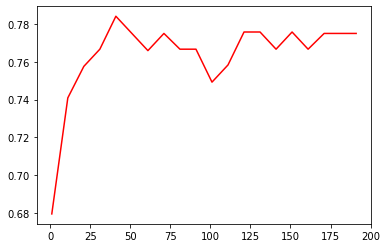

In [76]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

data_flag_0 = data[data['FLAG'] == 0]
data_flag_1 = data[data['FLAG'] == 1]

# 从非造假数据中选取80条数据
data_flag_0_choose = data_flag_0.sample(35)

# 和造假数据合并为一个数据集
data_re = pd.concat([data_flag_0_choose,data_flag_1])

X = data_re.loc[:, :'T_COGS']
y = data_re['FLAG']

# 绘制学习曲线来调参n_estimators（对随机森林影响最大）
score_lt = []

# 每隔10步建立一个随机森林，获得不同n_estimators的得分
# 这一步可以不变，找到最大得分的子树数量
for i in range(0,200,10):
    rf = RandomForestClassifier(n_estimators=i+1, random_state=90)
    score = cross_val_score(rf, X, y, cv=10).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('最大得分：{}'.format(score_max), '子树数量为：{}'.format(score_lt.index(score_max)*10+1))

# 绘制学习曲线
x = np.arange(1,201,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()

### 3.1.2 网格搜索

+ 使用网格搜索确定max_depth。

In [79]:
from sklearn.model_selection import GridSearchCV

# 建立n_estimators为41的随机森林
rfc = RandomForestClassifier(n_estimators=41, random_state=90)

# 用网格搜索调整max_depth
param_grid = {'max_depth':np.arange(1,20)}
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(X, y)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

{'max_depth': 8} 0.7840909090909091


+ 最后模型：n_estimators=41，max_depth=8，但是其实调参之后准确率变化不大。

## 3.2 Lightbgm调参

### 3.2.1 学习率和迭代次数

In [81]:
import pandas as pd
import lightgbm as lgb

data_flag_0 = data[data['FLAG'] == 0]
data_flag_1 = data[data['FLAG'] == 1]

# 从非造假数据中选取80条数据
data_flag_0_choose = data_flag_0.sample(35)

# 和造假数据合并为一个数据集
data_re = pd.concat([data_flag_0_choose,data_flag_1])

X = data_re.loc[:, :'T_COGS']
y = data_re['FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

params = {    
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric': 'auc',
          'nthread':4,
          'learning_rate':0.1,
          'num_leaves':30, 
          'max_depth': 5,   
          'subsample': 0.8, 
          'colsample_bytree': 0.8, 
    }
    
data_train = lgb.Dataset(X_train, y_train)
cv_results = lgb.cv(params, data_train, num_boost_round=1000, nfold=5, stratified=False, shuffle=True, metrics='auc',early_stopping_rounds=50,seed=0)
print('best n_estimators:', len(cv_results['auc-mean']))
print('best cv score:', pd.Series(cv_results['auc-mean']).max())

[LightGBM] [Info] Number of positive: 51, number of negative: 21
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2686
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 90
[LightGBM] [Info] Number of positive: 53, number of negative: 19
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2686
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 90
[LightGBM] [Info] Number of positive: 50, number of negative: 22
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2686
[LightGBM] [Info] Number of 

+ 取n_estimators=100。

### 确定max_depth和num_leaves

In [83]:
from sklearn.model_selection import GridSearchCV

params_test1={'max_depth': range(3,10,1), 'num_leaves':range(5, 100, 2)}
              
gsearch1 = GridSearchCV(estimator=lgb.LGBMClassifier(boosting_type='gbdt',
                                                     objective='binary',
                                                     metrics='auc',
                                                     learning_rate=0.1,
                                                     n_estimators=100), 
                        param_grid=params_test1,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1)

gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'num_leaves': 5}, 0.7055677655677656)

### 3.2.3 确定min_data_in_leaf和max_bin in

In [84]:
params_test2={'max_bin': range(5,256,10), 'min_data_in_leaf':range(1,102,10)}
              
gsearch2 = GridSearchCV(estimator=lgb.LGBMClassifier(boosting_type='gbdt',
                                                     objective='binary',
                                                     metrics='auc',
                                                     learning_rate=0.1,
                                                     n_estimators=147,
                                                     bagging_fraction=0.8,
                                                     feature_fraction=0.8), 
                        param_grid=params_test2,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1)

gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_bin': 65, 'min_data_in_leaf': 1}, 0.7558974358974357)

### 3.2.4 确定feature_fraction、bagging_fraction、bagging_freq

In [85]:
 params_test3={'feature_fraction': [0.6,0.7,0.8,0.9,1.0],
               'bagging_fraction': [0.6,0.7,0.8,0.9,1.0],
               'bagging_freq': range(0,81,10)
              }
              
gsearch3 = GridSearchCV(estimator=lgb.LGBMClassifier(boosting_type='gbdt',
                                                     objective='binary',
                                                     metrics='auc',
                                                     learning_rate=0.1,
                                                     n_estimators=147), 
                        param_grid=params_test3,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1)

gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'bagging_fraction': 0.9, 'bagging_freq': 70, 'feature_fraction': 0.7},
 0.7425641025641025)

### 3.2.5 确定lambda_l1和lambda_l2

In [86]:
params_test4={'lambda_l1': [1e-5,1e-3,1e-1,0.0,0.1,0.3,0.5,0.7,0.9,1.0],
              'lambda_l2': [1e-5,1e-3,1e-1,0.0,0.1,0.3,0.5,0.7,0.9,1.0]}
              
gsearch4 = GridSearchCV(estimator=lgb.LGBMClassifier(boosting_type='gbdt',
                                                     objective='binary',
                                                     metrics='auc',
                                                     learning_rate=0.1, 
                                                     n_estimators=147), 
                        param_grid=params_test4,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1)

gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

({'lambda_l1': 1e-05, 'lambda_l2': 0.9}, 0.7275457875457876)

### 3.2.6 确定 min_split_gain 

In [87]:
params_test5={'min_split_gain':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
              
gsearch5 = GridSearchCV(estimator=lgb.LGBMClassifier(boosting_type='gbdt',
                                                     objective='binary',
                                                     metrics='auc',
                                                     learning_rate=0.1,
                                                     n_estimators=147), 
                        param_grid=params_test5,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1)

gsearch5.fit(X_train, y_train)
gsearch5.best_params_, gsearch5.best_score_

({'min_split_gain': 0.2}, 0.7284981684981686)

+ 遇到的问题：每次调参准确率都没办法提高，导致下一步也没有设定上一步调整的参数，只能先使用默认参数。

# 4 准确率

In [90]:
# 记录平均得分
new = pd.DataFrame(pd.DataFrame(score).mean())

# 加入真实数据做对照
new['fin'] = y_test.values

# 重新命名列
new.columns = ['p', 'act']

# 创建新列
new['op'] = 0

# 概率大于0.65为造假
new[new['p']>0.65] = 1

# 计算准确率
count = 0
for x, y in zip(new.act.values, new.op.values):
    if x==y:
        count += 1

# 输出准确率
print(count/y_test.shape[0])

0.9130434782608695


# 5 特征重要性

+ 也是投票的思想，记录每次的特征重要性并进行计数，票高者得。

In [91]:
# 记录特征重要性
imp_df = pd.DataFrame(imp)

# 记录各行特征重要性前20
imp_20 = []
for i in range(100):
    imp_20.append(list(imp_df.iloc[i, :].sort_values(ascending = False).index)[:20])

# 统计各行特征重要性前20的数量
imp_dict = {}
for i in imp_20:
    for j in i:
        if j in imp_dict:
            imp_dict[j] += 1
        else:
            imp_dict[j] = 1

# 对字典值进行排序
imp_dict_order=sorted(imp_dict.items(),key=lambda x: x[1],reverse=True)
imp_dict_order[:20]

# 存储最终前20特征的列名
imp_name = []
for tup in imp_dict_order[:20]:
        imp_name.append(list(data.columns)[tup[0]])
        
# 打印输出
for i in imp_name:
    print(i)

DILUTED_EPS
BASIC_EPS
N_CF_FR_INVEST_A
RETAINED_EARNINGS
ASSETS_IMPAIR_LOSS
PAID_IN_CAPITAL
OPERATE_PROFIT
OTH_PAYABLE
N_INCOME
T_COMPR_INCOME
T_PROFIT
PREPAYMENT
N_CHANGE_IN_CASH
N_INCOME_ATTR_P
NOPERATE_EXP
C_PAID_OTH_FINAN_A
FINAN_EXP
REFUND_OF_TAX
COMPR_INC_ATTR_P
INVEST_INCOME


In [57]:
# 将输出的结果保存进new.xlsx
new.to_excel('new.xlsx')

# 6 反向验证

In [93]:
# 以下几个指标是得到的共有的重要指标
data1 = data[['BASIC_EPS', 'CAPITAL_RESER', 'OTH_PAYABLE', 'PAID_IN_CAPITAL', 'REFUND_OF_TAX', 'RETAINED_EARNINGS', 'FLAG']]

In [94]:
# 统计数量
data1.FLAG.value_counts()

0    9863
1      80
Name: FLAG, dtype: int64

In [95]:
# 查看数据
data1

,BASIC_EPS,CAPITAL_RESER,OTH_PAYABLE,PAID_IN_CAPITAL,REFUND_OF_TAX,RETAINED_EARNINGS,FLAG
0,0.523274,0.037866,0.000009,0.006471,0.000117,0.108256,0
1,0.530470,0.017691,0.002898,0.011688,0.002961,0.115495,0
4,0.522600,0.069748,0.001678,0.014588,0.001576,0.112624,0
6,0.521700,0.041376,0.000793,0.005265,0.029794,0.109624,0
7,0.538116,0.017746,0.000003,0.001097,0.000028,0.106603,0
...,...,...,...,...,...,...,...
18053,0.539690,0.018545,0.003908,0.001386,0.000754,0.107543,0
18054,0.516303,0.024187,0.000077,0.003475,0.000249,0.104643,0
18055,0.521250,0.018031,0.000112,0.009003,0.001714,0.108102,0
18058,0.518327,0.045482,0.000474,0.009515,0.010078,0.111623,0


In [98]:
# 保存模型得分
score = []

# 保存模型特征重要性
imp = []

# 训练次数
num = 100

# 分别选出是否造假的数据
data1_flag_0 = data1[data1['FLAG'] == 0]
data1_flag_1 = data1[data1['FLAG'] == 1]

# 训练num轮
for i in range(num):
    
    # 从非造假数据中选取80条数据
    data1_flag_0_choose = data1_flag_0.sample(80)
    
    # 和造假数据合并为一个数据集
    data_re = pd.concat([data1_flag_0_choose,data1_flag_1])

    X = data_re.loc[:, :'RETAINED_EARNINGS']
    y = data_re['FLAG']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

    # 随机欠采样
    # rus = RandomUnderSampler(random_state=0)
    # X_rus, y_rus = rus.fit_resample(X_train, y_train)

    # 随机过采样
    ros = RandomOverSampler(random_state=0,sampling_strategy='auto')  
    X_train, y_train = ros.fit_resample(X_train, y_train)

    # 训练模型
    # RandomForest model
    model = RandomForestClassifier(max_depth=4, random_state=2)
    # DecisionTree model
    # model = DecisionTreeClassifier(criterion='entropy')
    # XGBoost model
    # model = xgb.XGBClassifier(max_depth=7, learning_rate=0.1, n_estimators=300, silent=True)
    model.fit(X_train,y_train)

    # 对测试集进行预测
    y_pred = model.predict(X_test)

    # 计算准确率
    accuracy = accuracy_score(y_test,y_pred)
    print("完成度：", round((i+1)/num*100, 2), '%', sep='')
    
    # print('Accuracy:', accuracy)
    imp.append(list(model.feature_importances_))
    score.append(list(y_pred))

完成度：1.0%
完成度：2.0%
完成度：3.0%
完成度：4.0%
完成度：5.0%
完成度：6.0%
完成度：7.0%
完成度：8.0%
完成度：9.0%
完成度：10.0%
完成度：11.0%
完成度：12.0%
完成度：13.0%
完成度：14.0%
完成度：15.0%
完成度：16.0%
完成度：17.0%
完成度：18.0%
完成度：19.0%
完成度：20.0%
完成度：21.0%
完成度：22.0%
完成度：23.0%
完成度：24.0%
完成度：25.0%
完成度：26.0%
完成度：27.0%
完成度：28.0%
完成度：29.0%
完成度：30.0%
完成度：31.0%
完成度：32.0%
完成度：33.0%
完成度：34.0%
完成度：35.0%
完成度：36.0%
完成度：37.0%
完成度：38.0%
完成度：39.0%
完成度：40.0%
完成度：41.0%
完成度：42.0%
完成度：43.0%
完成度：44.0%
完成度：45.0%
完成度：46.0%
完成度：47.0%
完成度：48.0%
完成度：49.0%
完成度：50.0%
完成度：51.0%
完成度：52.0%
完成度：53.0%
完成度：54.0%
完成度：55.0%
完成度：56.0%
完成度：57.0%
完成度：58.0%
完成度：59.0%
完成度：60.0%
完成度：61.0%
完成度：62.0%
完成度：63.0%
完成度：64.0%
完成度：65.0%
完成度：66.0%
完成度：67.0%
完成度：68.0%
完成度：69.0%
完成度：70.0%
完成度：71.0%
完成度：72.0%
完成度：73.0%
完成度：74.0%
完成度：75.0%
完成度：76.0%
完成度：77.0%
完成度：78.0%
完成度：79.0%
完成度：80.0%
完成度：81.0%
完成度：82.0%
完成度：83.0%
完成度：84.0%
完成度：85.0%
完成度：86.0%
完成度：87.0%
完成度：88.0%
完成度：89.0%
完成度：90.0%
完成度：91.0%
完成度：92.0%
完成度：93.0%
完成度：94.0%
完成度：95.0%
完成度：96.0%
完成度：97.0%
完成度：98.0%
完成度：99.0%
完成度：100.0%


In [99]:
# 记录平均得分
new = pd.DataFrame(pd.DataFrame(score).mean())

# 加入真实数据做对照
new['fin'] = y_test.values

# 重新命名列
new.columns = ['p', 'act']

# 创建新列
new['op'] = 0

# 概率大于0.65为造假
new[new['p']>0.65] = 1

# 计算准确率
count = 0
for x, y in zip(new.act.values, new.op.values):
    if x==y:
        count += 1

# 输出准确率
print(count/y_test.shape[0])

0.78125


和之前的结果相比下降了 0.9130434782608695 - 0.78125。

In [104]:
print('下降：', str(round(0.9130434782608695 - 0.78125, 2)*100) + '%')

下降： 13.0%
